# Importing libraries and Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [15]:
df = pd.read_csv(r"C:\Users\kumar\Downloads\Data_set\diabetes.csv")  

# Data Analysis

In [16]:
print(df.shape)
df.sample(7)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
457,5,86,68,28,71,30.2,0.364,24,0
259,11,155,76,28,150,33.3,1.353,51,1
542,10,90,85,32,0,34.9,0.825,56,1
284,2,108,80,0,0,27.0,0.259,52,1
475,0,137,84,27,0,27.3,0.231,59,0
691,13,158,114,0,0,42.3,0.257,44,1
80,3,113,44,13,0,22.4,0.140,22,0


In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome
0    500
1    268
Name: count, dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

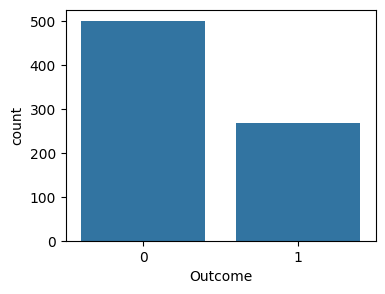

In [18]:
print(df['Outcome'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(x = 'Outcome',data = df)

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [21]:
column_names = X.columns
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled_array, columns=column_names)
X.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111


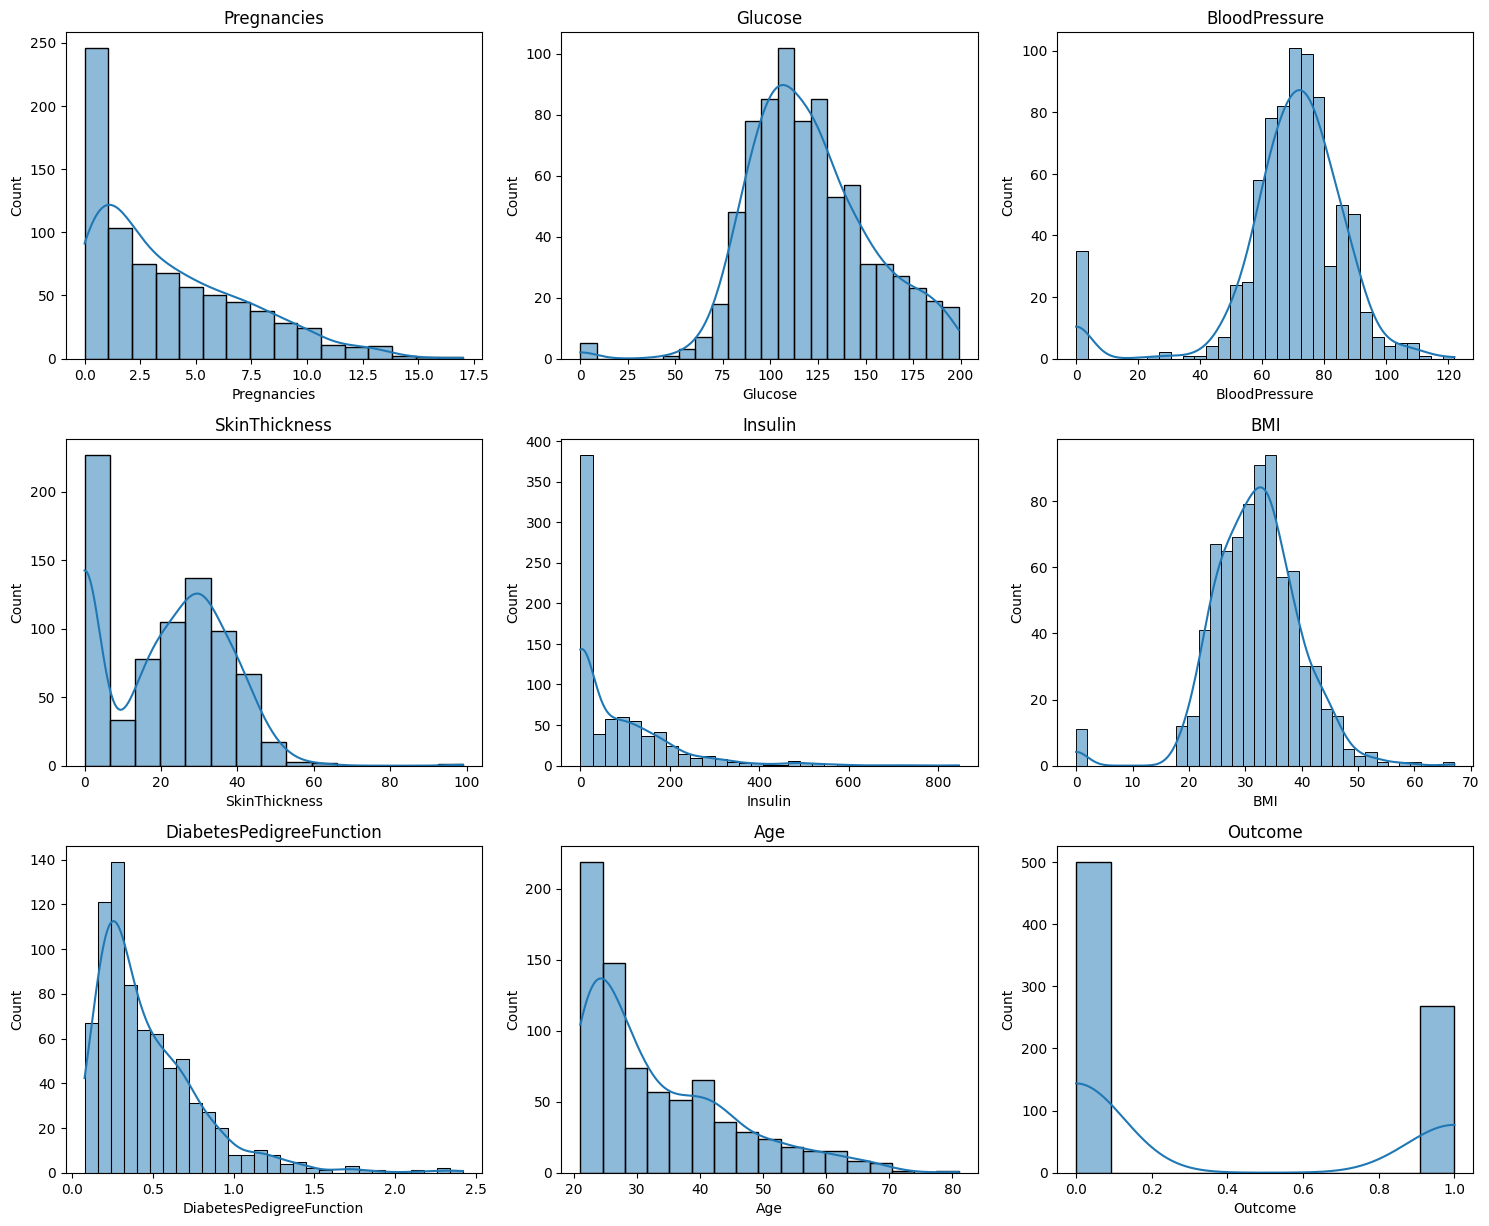

In [22]:
cols = df.columns
n = len(cols)
rows = (n // 3) + 1

plt.figure(figsize=(15, 4 * rows))

i = 1  
for col in cols:
    plt.subplot(rows, 3, i)
    sns.histplot(data=df[col], kde=True)
    plt.title(f"{col}")
    i += 1  

plt.tight_layout()
plt.show()


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# SMOTE

In [24]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Data Modeling and Prediction

In [28]:
KNN=KNeighborsClassifier()
NB=GaussianNB()
RF=RandomForestClassifier()
LR=LogisticRegression()
SVM=SVC()
XG= XGBClassifier()

In [29]:
KNN.fit(X_train_resampled,y_train_resampled)
NB.fit(X_train_resampled,y_train_resampled)
RF.fit(X_train_resampled,y_train_resampled)
LR.fit(X_train_resampled,y_train_resampled)
SVM.fit(X_train_resampled,y_train_resampled)
XG.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [30]:
y_pred_knn=KNN.predict(X_test)
y_pred_nb=NB.predict(X_test)
y_pred_rf=RF.predict(X_test)
y_pred_lr=LR.predict(X_test)
y_pred_svm=SVM.predict(X_test)
y_pred_xgboost=XG.predict(X_test)

# Model Evalution

In [31]:
model_predictions = {
    'Logistic Regression': y_pred_lr,
    'K Nearest Neighbors': y_pred_knn,
    'Support Vector Classifier': y_pred_svm,
    'Naive Bayes': y_pred_nb,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgboost}

print("Accuracy :- ")
for model_name, y_pred in model_predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: {accuracy * 100:.2f}%")
    
print("\nf1_score :- ")
for model_name, y_pred in model_predictions.items():
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name}: {f1 * 100:.2f}%")

print("\nroc auc score :- ")
for model_name, y_pred in model_predictions.items():
    roc = roc_auc_score(y_test, y_pred)
    print(f"{model_name}: {roc * 100:.2f}%")

Accuracy :- 
Logistic Regression: 73.96%
K Nearest Neighbors: 68.75%
Support Vector Classifier: 72.92%
Naive Bayes: 73.44%
Random Forest: 75.00%
XGBoost: 75.00%

f1_score :- 
Logistic Regression: 64.79%
K Nearest Neighbors: 60.00%
Support Vector Classifier: 64.86%
Naive Bayes: 65.31%
Random Forest: 65.22%
XGBoost: 64.18%

roc auc score :- 
Logistic Regression: 72.73%
K Nearest Neighbors: 68.38%
Support Vector Classifier: 72.62%
Naive Bayes: 73.02%
Random Forest: 73.18%
XGBoost: 72.49%


Getting maximum accuracy,f1 score and roc auc score for Random Forest

# Hyperparameter Tuning and Cross Validation using GridSearchCV

In [53]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost' : XGBClassifier()
}

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']},
    
    'K Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']},
    
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']},
    
    'Naive Bayes': {# No significant hyperparameters to tune for GaussianNB
    },
    'Random Forest': {
        'n_estimators': [10,50, 100],
        'max_depth': [None, 10, 20]},

    'XGBoost' : {
    'xgb__n_estimators': [5,10,20,30],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1.0]}
}

# Store best predictions
model_predictions = {}

for model_name, model in models.items():
    print(f"\nRunning GridSearchCV for {model_name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids.get(model_name, {}),  # Empty dict for NB
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )
    grid.fit(X_train_resampled,y_train_resampled)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    model_predictions[model_name] = y_pred
    print(f"Best Parameters: {grid.best_params_}")




Running GridSearchCV for Logistic Regression...
Best Parameters: {'C': 1, 'solver': 'lbfgs'}

Running GridSearchCV for K Nearest Neighbors...
Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}

Running GridSearchCV for Support Vector Classifier...
Best Parameters: {'C': 10, 'kernel': 'rbf'}

Running GridSearchCV for Naive Bayes...
Best Parameters: {}

Running GridSearchCV for Random Forest...
Best Parameters: {'max_depth': 10, 'n_estimators': 100}

Running GridSearchCV for XGBoost...


C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:36:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators", "xgb__subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 5, 'xgb__subsample': 0.8}


In [54]:
print("Accuracy :-")
for model_name, y_pred in model_predictions.items():
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name}: {acc * 100:.2f}%")

print("\nF1 Score :-")
for model_name, y_pred in model_predictions.items():
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name}: {f1 * 100:.2f}%")

print("\nROC AUC Score :-")
for model_name, y_pred in model_predictions.items():
    roc = roc_auc_score(y_test, y_pred)
    print(f"{model_name}: {roc * 100:.2f}%")


Accuracy :-
Logistic Regression: 73.96%
K Nearest Neighbors: 67.19%
Support Vector Classifier: 72.92%
Naive Bayes: 73.44%
Random Forest: 75.00%
XGBoost: 75.00%

F1 Score :-
Logistic Regression: 74.26%
K Nearest Neighbors: 67.84%
Support Vector Classifier: 73.16%
Naive Bayes: 73.88%
Random Forest: 75.08%
XGBoost: 75.00%

ROC AUC Score :-
Logistic Regression: 72.73%
K Nearest Neighbors: 66.84%
Support Vector Classifier: 71.24%
Naive Bayes: 73.02%
Random Forest: 72.84%
XGBoost: 72.49%
